In [1]:
from netCDF4 import Dataset
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
nc = Dataset('../../measurements/bathymetry/erie_lld.grd')

In [8]:
import cmocean

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [6]:
topo = -nc.variables['z'][:] #[::10,::10]
x = nc.variables['x'][:] #[::10]
y = nc.variables['y'][:] #[::10]
lon_0 = x.mean()
lat_0 = y.mean()
lon, lat = np.meshgrid(x, y)
m = Basemap(width=500000*0.8,height=300000*0.8, resolution='f',projection='stere',lat_0=lat_0+0.2,lon_0=lon_0-0.2)
x, y = m(lon, lat)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


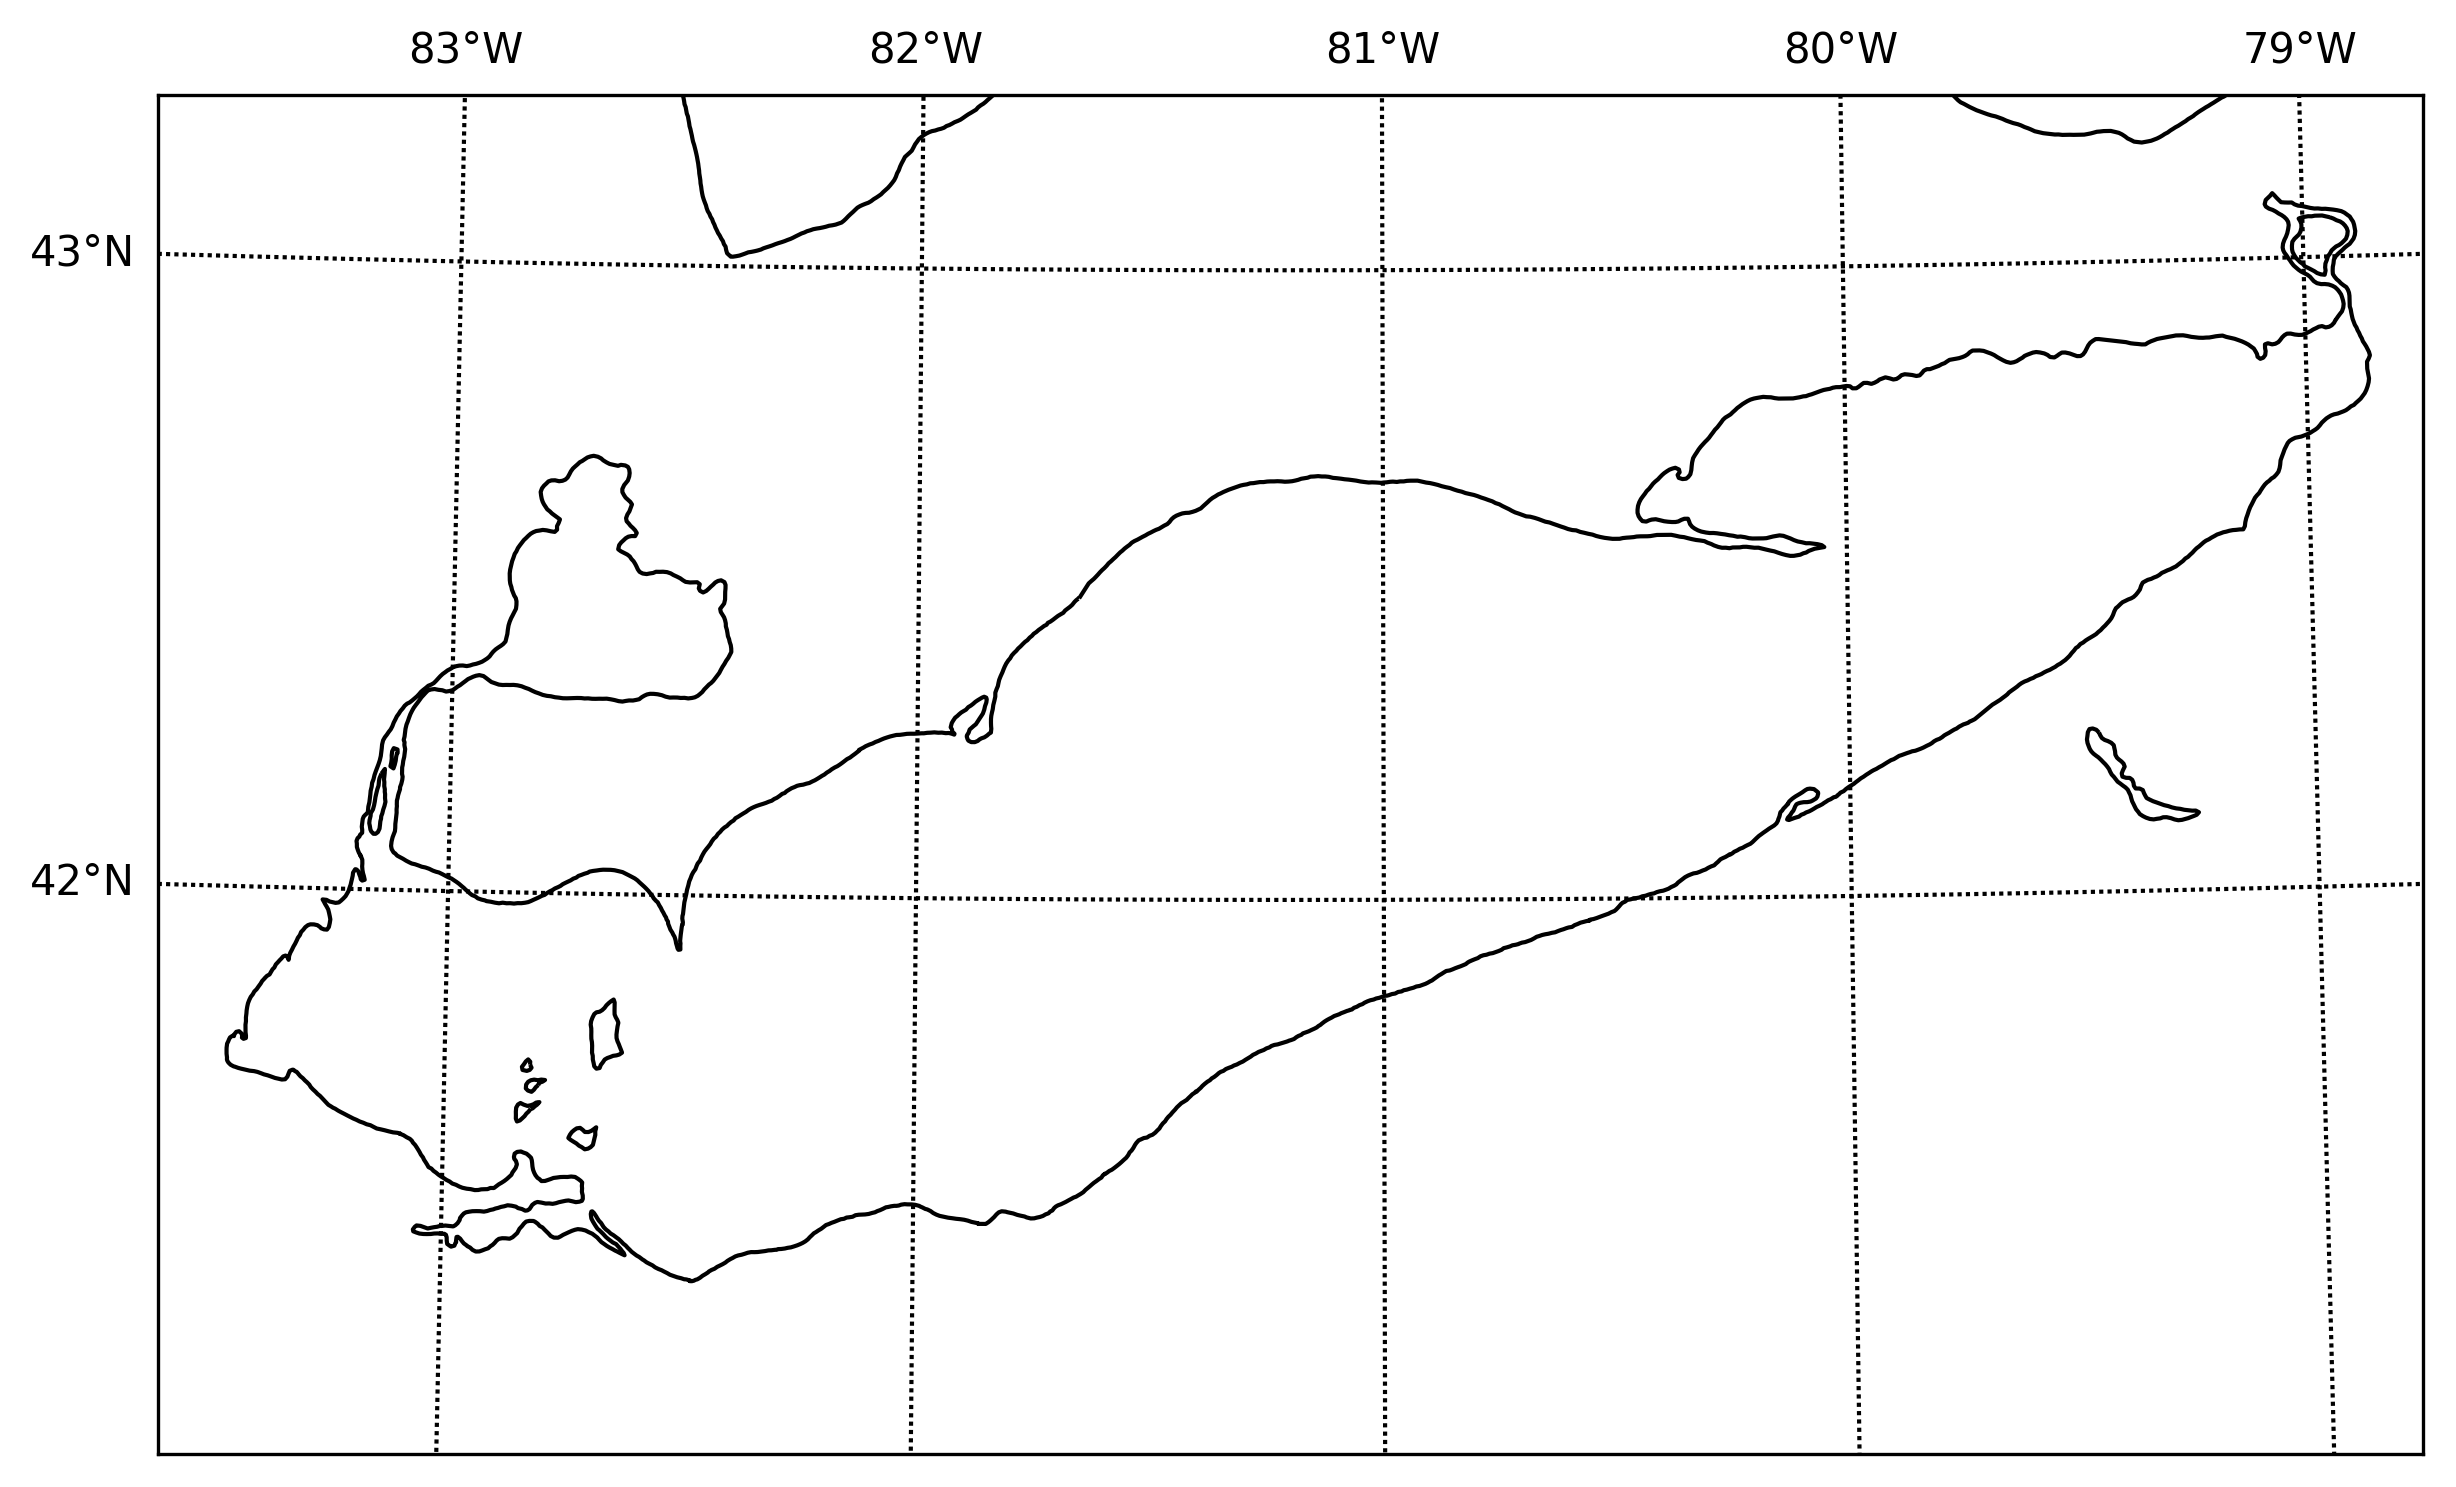

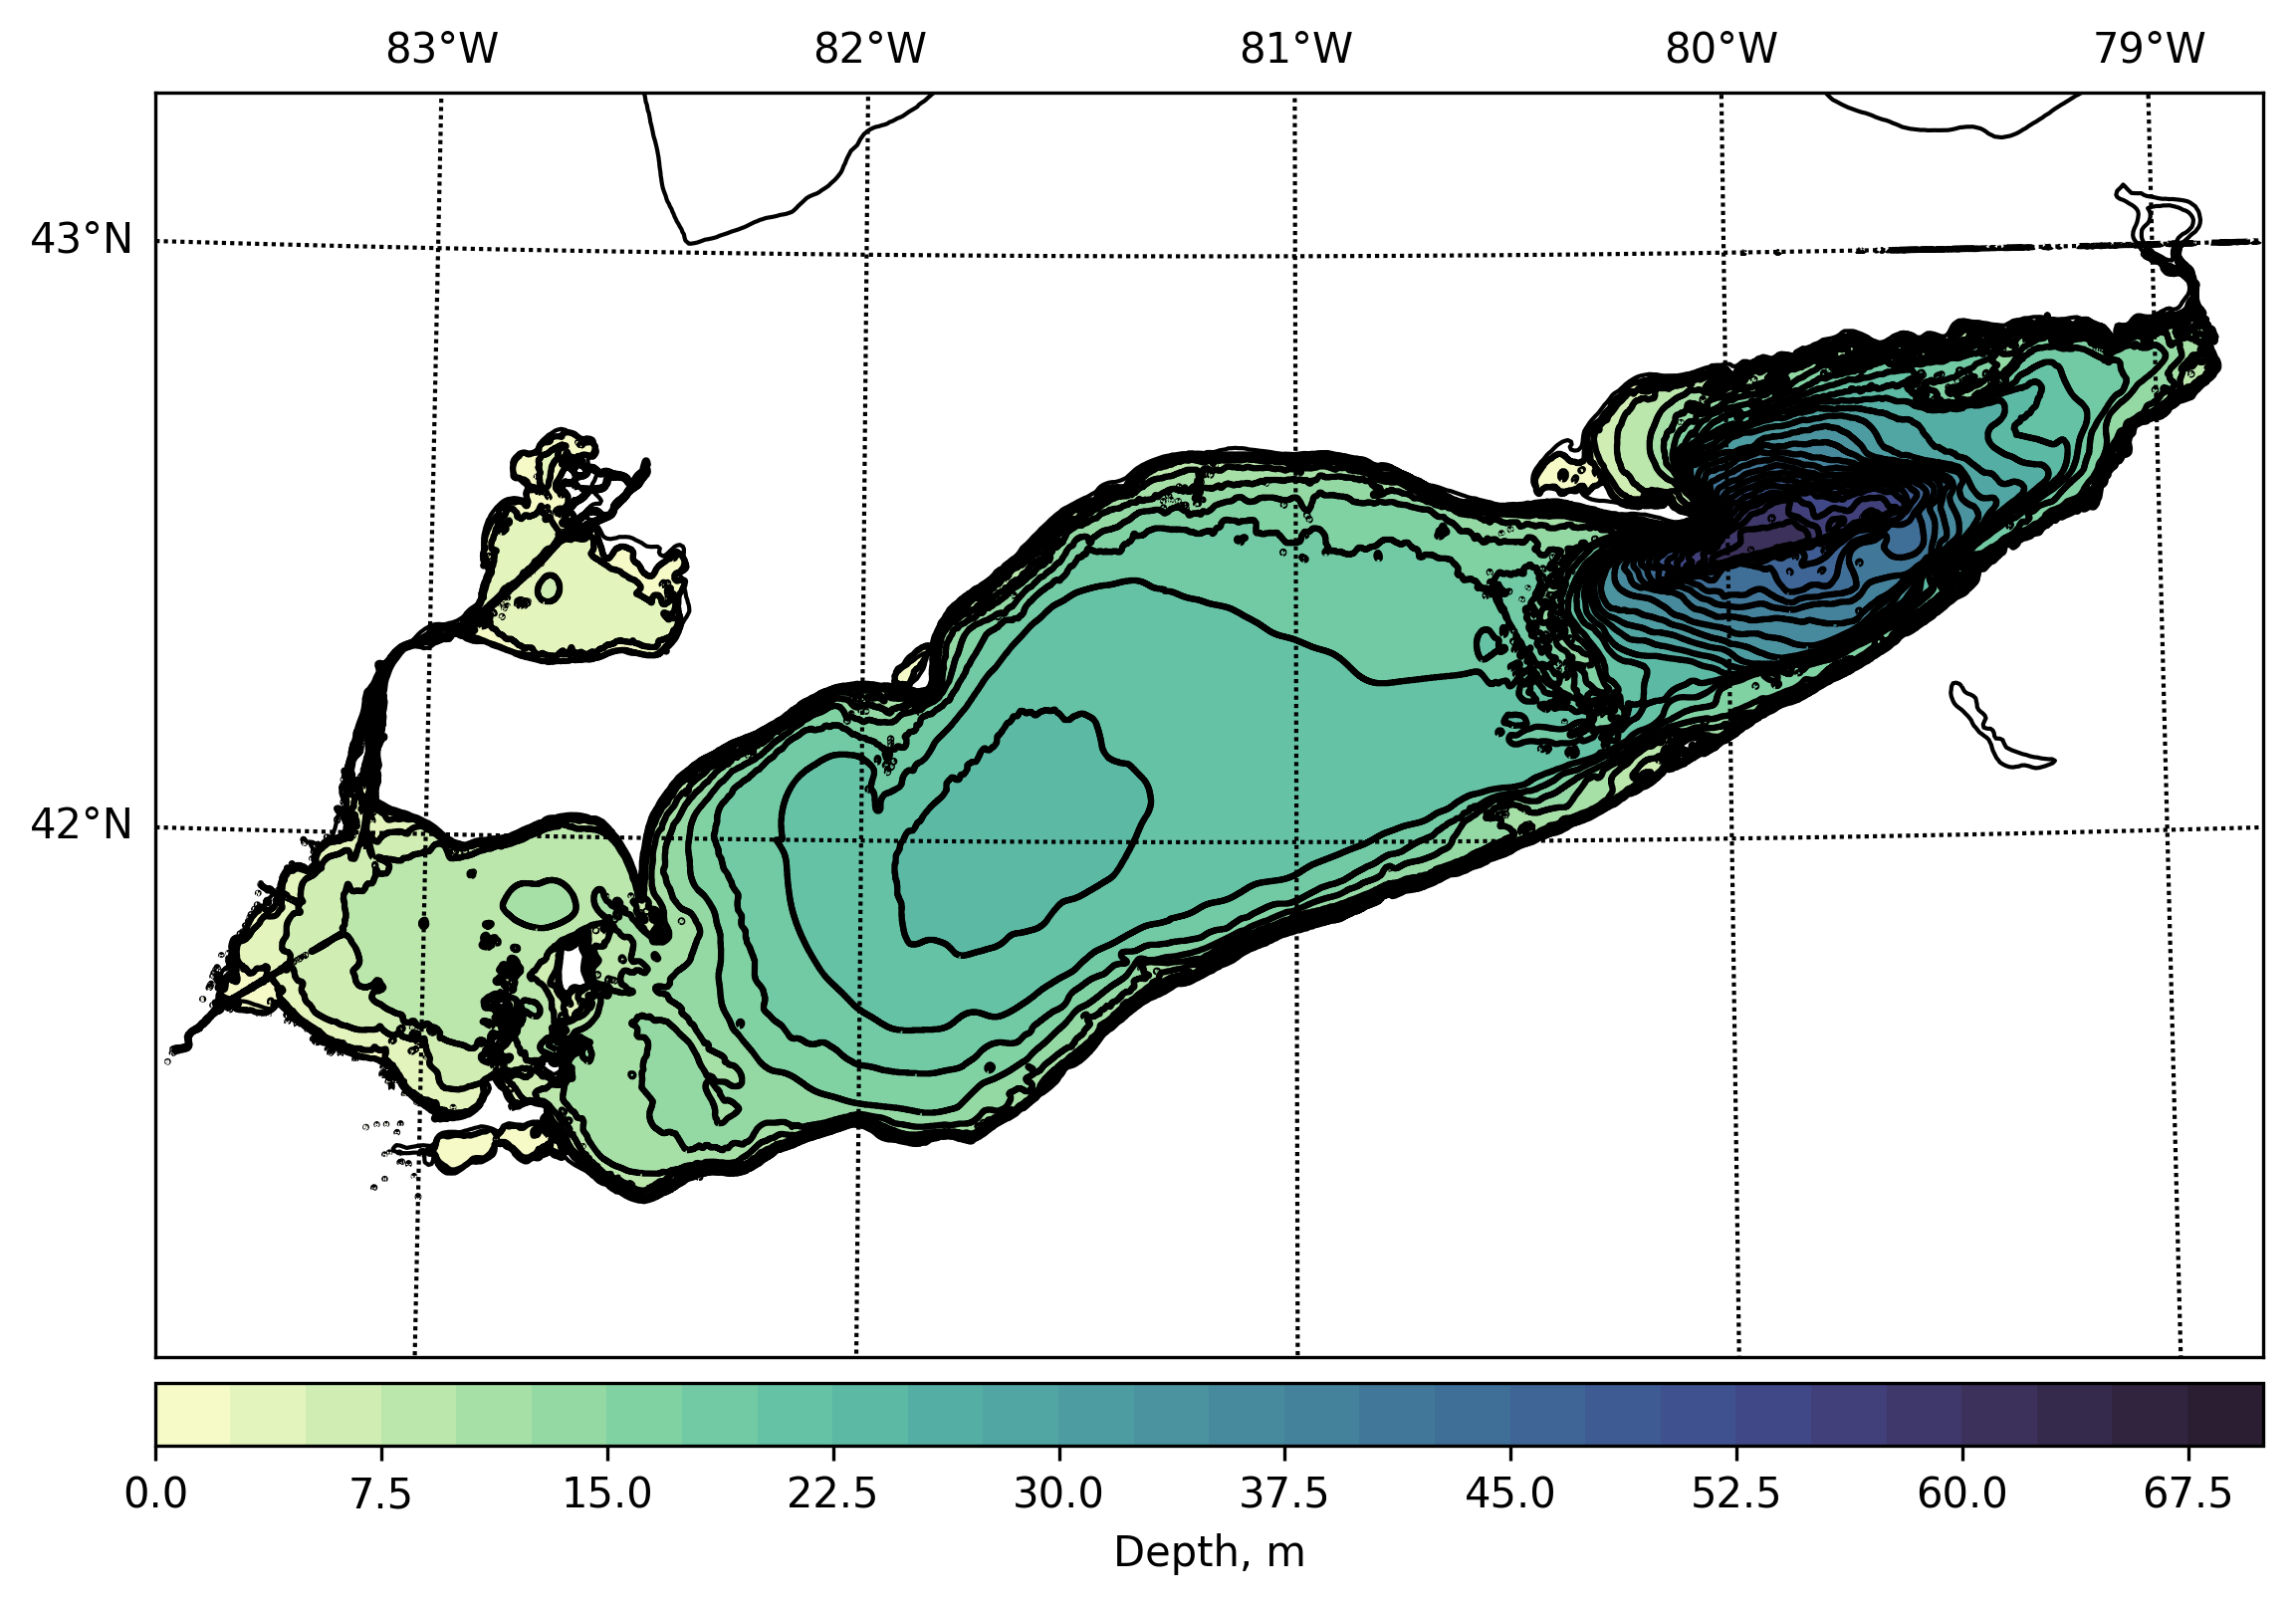

In [9]:




levels1 = np.linspace(0,70,14*2+1)
levels2 = np.linspace(0,70,14+1)
# levels2 = np.linspace(-10,0,14*2+1)
plt.figure(figsize=(12,6), dpi=300)

# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
m.drawcoastlines()
m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])
cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
plt.contour(x,y,topo, levels=levels1, colors='k')  # negative contours will be dashed by default
                 
# c = m.contourf(x,y,topo, levels=levels2,cmap=cmocean.cm.solar)
cbar = m.colorbar(cax,location='bottom')

# cbar = m.colorbar(cs, location='bottom')
cbar.set_label('Depth, m')
plt.show()
# plt.savefig('Bathymetry.png')


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import gdal

In [ ]:


raster = gdal.Open('ice/grid2011/g20110202.ct')
band = raster.GetRasterBand(1)
array = band.ReadAsArray()
plt.imshow(array)

In [ ]:
band

In [ ]:
x